**Name:** Keval R Shah  
**SAP:** 60009220061  
**Batch :** D2-1  
**Lab:** ML Lab 3


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!ls

carprediction.csv  sample_data


In [ ]:
data=pd.read_csv("carprediction.csv")
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [ ]:
data.duplicated().sum()

715

In [ ]:
data['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df['Engine HP']=df['Engine HP'].fillna(data['Engine HP'].mean())
df['Engine Cylinders']=df['Engine Cylinders'].fillna(data['Engine Cylinders'].mean())

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df1=pd.DataFrame(df)

In [ ]:
df1=df1.dropna()

In [ ]:
df1.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df1['Make']= label_encoder.fit_transform(df1['Make'])
df1['Model']= label_encoder.fit_transform(df1['Model'])
df1['Engine Fuel Type']= label_encoder.fit_transform(df1['Engine Fuel Type'])
df1['Transmission Type']= label_encoder.fit_transform(df1['Transmission Type'])
df1['Driven_Wheels']= label_encoder.fit_transform(df1['Driven_Wheels'])
df1['Market Category']= label_encoder.fit_transform(df1['Market Category'])
df1['Vehicle Size']= label_encoder.fit_transform(df1['Vehicle Size'])
df1['Vehicle Style']= label_encoder.fit_transform(df1['Vehicle Style'])

In [ ]:
X=df1.drop(["MSRP"],axis=1)
y=df1["MSRP"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
reg=DecisionTreeRegressor(random_state=101)

In [ ]:
reg.fit(X_train,y_train)

DecisionTreeRegressor(random_state=101)

In [ ]:
y_train_pred=reg.predict(X_train)

In [ ]:
y_test_pred=reg.predict(X_test)

In [ ]:
train = reg.score(X_train,y_train)
train

0.9980688478436217

In [ ]:
test = reg.score(X_test,y_test)
test

0.9527975555500989

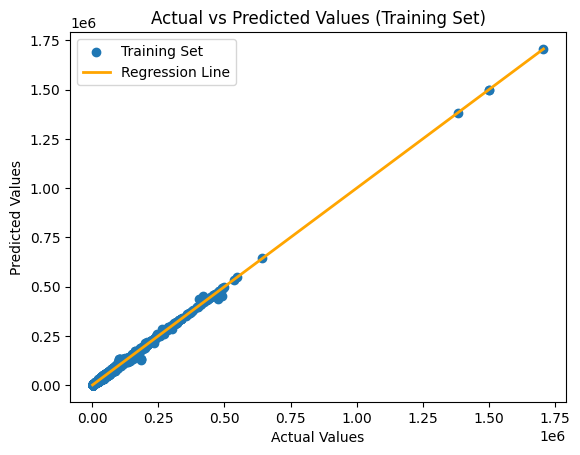

In [ ]:
plt.scatter(y_train, y_train_pred, label='Training Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Training Set)')
plt.plot([min(y_train), max(y_train)], [min(y_train_pred), max(y_train_pred)], color='orange',linewidth=2, label='Regression Line')

plt.legend()
plt.show()

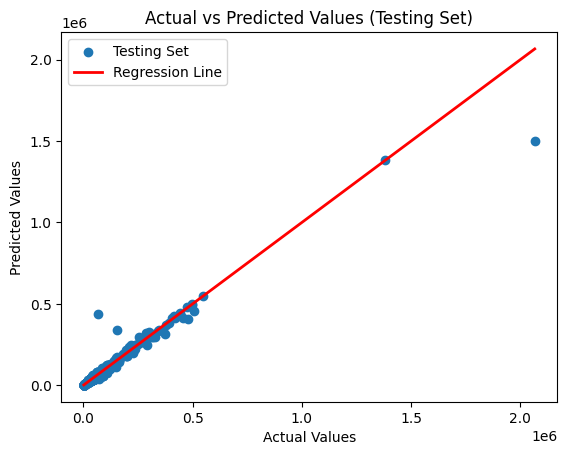

In [ ]:
plt.scatter(y_test, y_test_pred, label='Testing Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Testing Set)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Regression Line')

plt.legend()
plt.show()